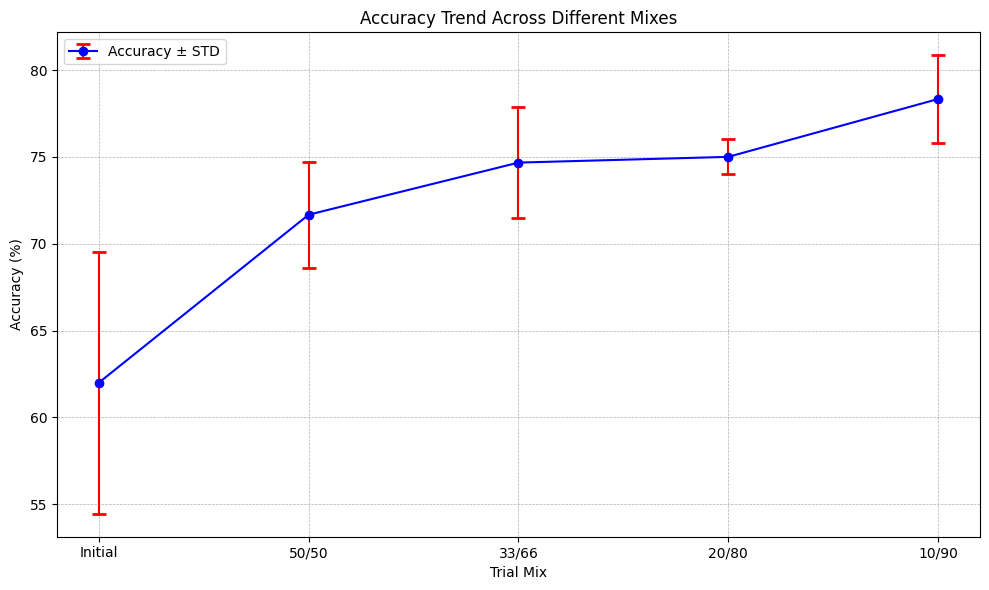

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
trials = ['Initial', '50/50', '33/66', '20/80', '10/90']
accuracies = [62.00, 71.67, 74.67, 75.00, 78.33]
accuracy_stds = [7.55, 3.06, 3.21, 1.00, 2.52]

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(trials, accuracies, yerr=accuracy_stds, fmt='-o', capsize=5, capthick=2, ecolor='red', color='blue', label='Accuracy ± STD')

# Titles and Labels
plt.title('Accuracy Trend Across Different Mixes')
plt.xlabel('Trial Mix')
plt.ylabel('Accuracy (%)')
plt.xticks(trials)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()


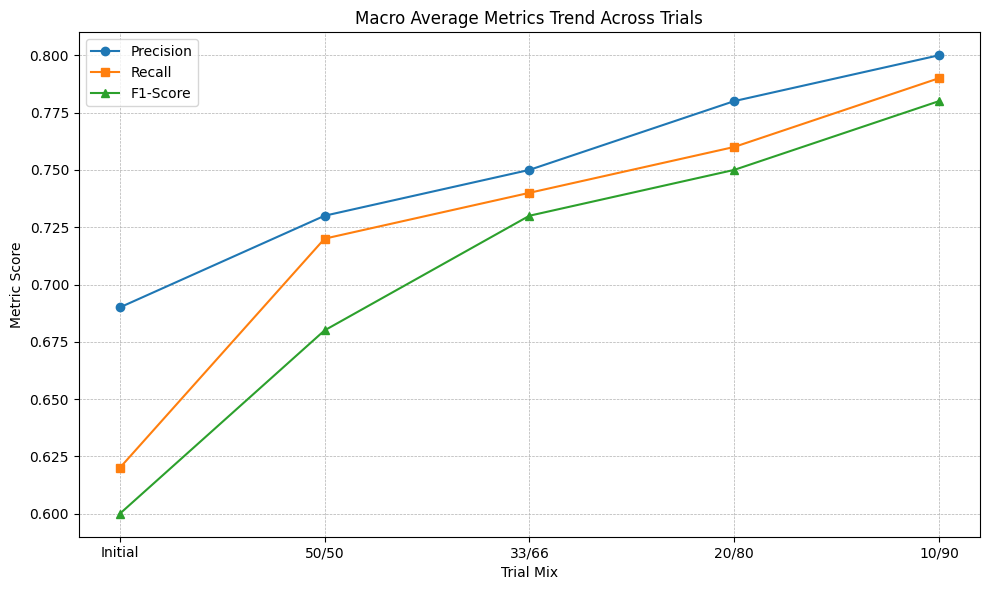

In [7]:
# Macro Average Data
macro_precision = [0.69, 0.73, 0.75, 0.78, 0.80]
macro_recall = [0.62, 0.72, 0.74, 0.76, 0.79]
macro_f1_score = [0.60, 0.68, 0.73, 0.75, 0.78]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trials, macro_precision, marker='o', linestyle='-', label='Precision')
plt.plot(trials, macro_recall, marker='s', linestyle='-', label='Recall')
plt.plot(trials, macro_f1_score, marker='^', linestyle='-', label='F1-Score')

# Titles and Labels
plt.title('Macro Average Metrics Trend Across Trials')
plt.xlabel('Trial Mix')
plt.ylabel('Metric Score')
plt.xticks(trials)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

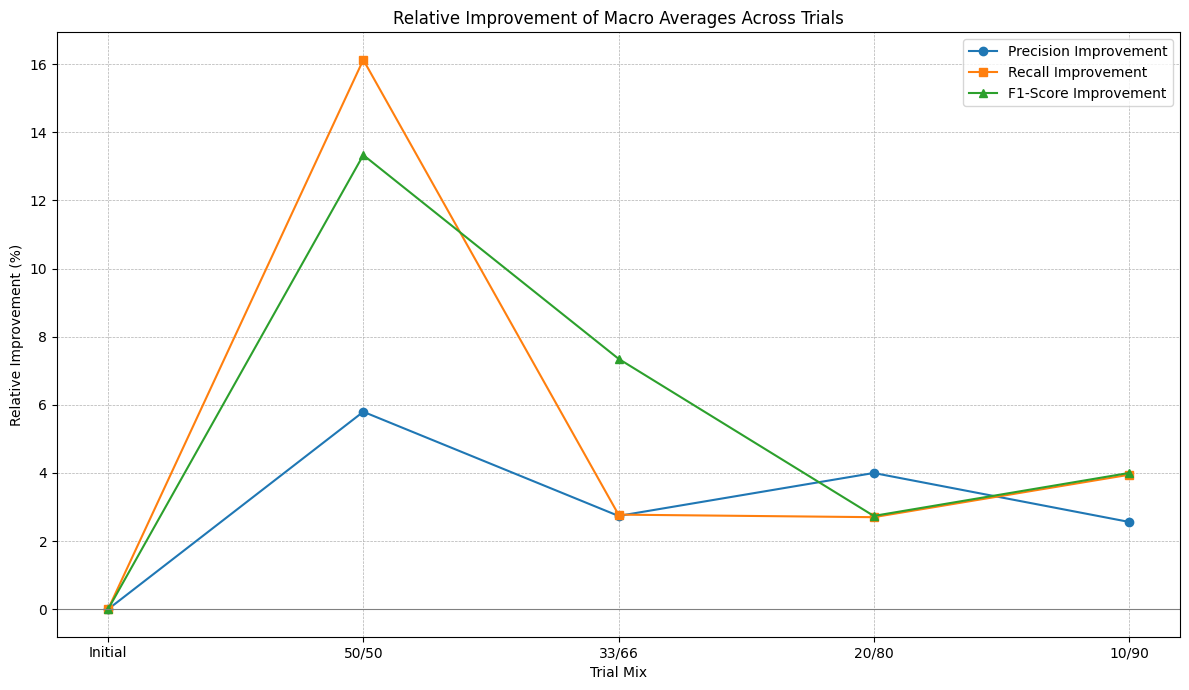

In [9]:
# Calculate relative improvements for macro averages
def calculate_relative_improvement(values):
    return [((values[i] - values[i-1]) / values[i-1]) * 100 if i > 0 else 0 for i in range(len(values))]

relative_improvement_precision = calculate_relative_improvement(macro_precision)
relative_improvement_recall = calculate_relative_improvement(macro_recall)
relative_improvement_f1_score = calculate_relative_improvement(macro_f1_score)

# Plotting the relative improvements
plt.figure(figsize=(12, 7))

plt.plot(trials, relative_improvement_precision, marker='o', linestyle='-', label='Precision Improvement')
plt.plot(trials, relative_improvement_recall, marker='s', linestyle='-', label='Recall Improvement')
plt.plot(trials, relative_improvement_f1_score, marker='^', linestyle='-', label='F1-Score Improvement')

plt.title('Relative Improvement of Macro Averages Across Trials')
plt.xlabel('Trial Mix')
plt.ylabel('Relative Improvement (%)')
plt.xticks(trials)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='grey', linewidth=0.8)  # Add a line at 0% improvement for reference
plt.legend()

plt.tight_layout()
plt.show()

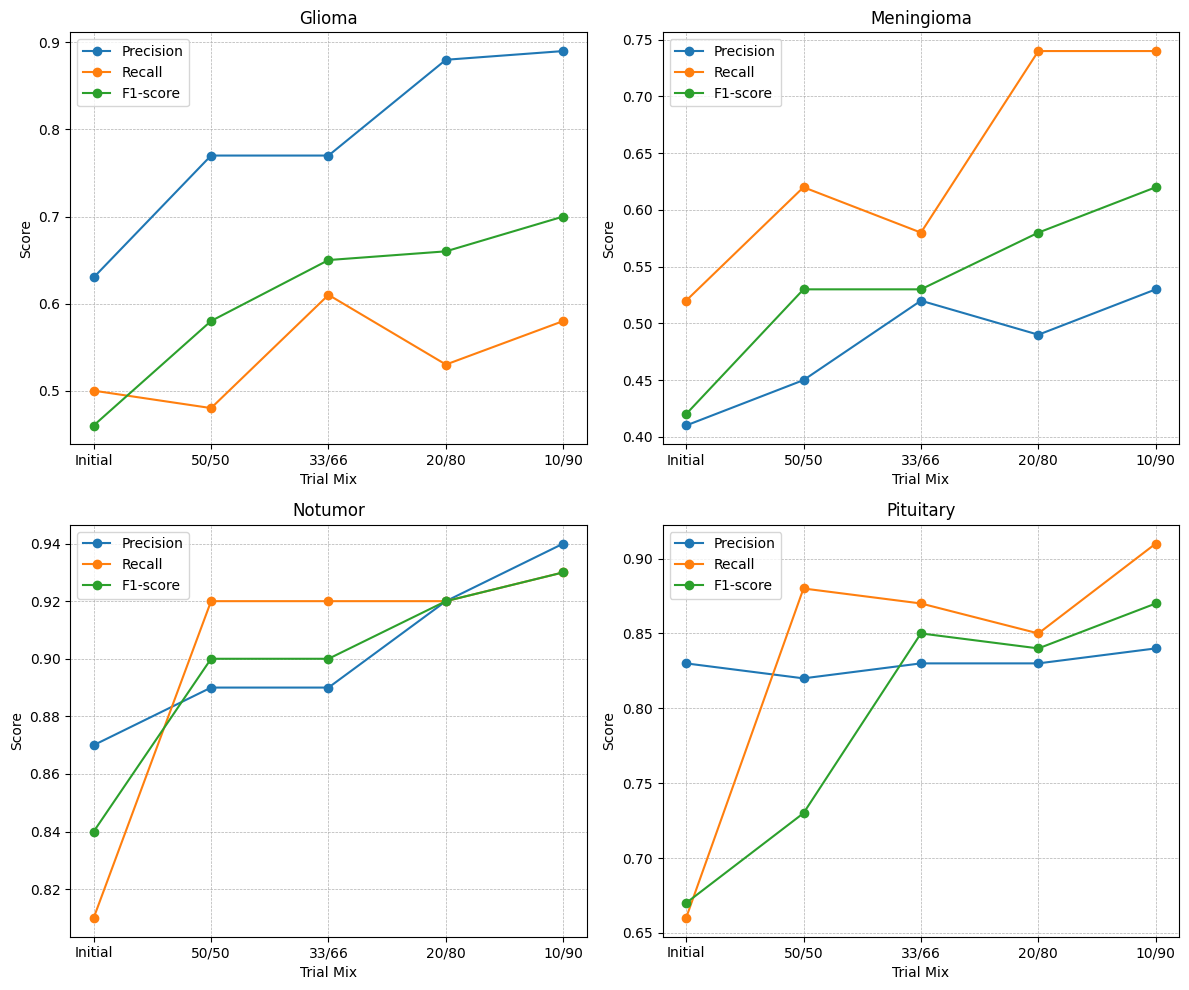

In [3]:
# Class-wise Metrics Data (Assuming example trends for visualization)
# Each class will have a dictionary with metrics and their values across trials
class_data = {
    "glioma": {
        "precision": [0.63, 0.77, 0.77, 0.88, 0.89],
        "recall": [0.50, 0.48, 0.61, 0.53, 0.58],
        "f1-score": [0.46, 0.58, 0.65, 0.66, 0.70]
    },
    "meningioma": {
        "precision": [0.41, 0.45, 0.52, 0.49, 0.53],
        "recall": [0.52, 0.62, 0.58, 0.74, 0.74],
        "f1-score": [0.42, 0.53, 0.53, 0.58, 0.62]
    },
    "notumor": {
        "precision": [0.87, 0.89, 0.89, 0.92, 0.94],
        "recall": [0.81, 0.92, 0.92, 0.92, 0.93],
        "f1-score": [0.84, 0.90, 0.90, 0.92, 0.93]
    },
    "pituitary": {
        "precision": [0.83, 0.82, 0.83, 0.83, 0.84],
        "recall": [0.66, 0.88, 0.87, 0.85, 0.91],
        "f1-score": [0.67, 0.73, 0.85, 0.84, 0.87]
    }
}

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Looping through each class and its metrics to plot
for ax, (class_name, metrics) in zip(axs.flatten(), class_data.items()):
    for metric, values in metrics.items():
        ax.plot(trials, values, marker='o', linestyle='-', label=metric.capitalize())
    
    ax.set_title(class_name.capitalize())
    ax.set_xlabel('Trial Mix')
    ax.set_ylabel('Score')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()

plt.tight_layout()
plt.show()